# Listing 2.1 Loading the MNIST dataset in Keras

In [139]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [140]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()

In [141]:
train_images.shape

(60000, 28, 28)

In [142]:
train_labels.shape

(60000,)

In [143]:
test_images.shape

(10000, 28, 28)

In [144]:
test_labels.shape

(10000,)

### Plot some Images

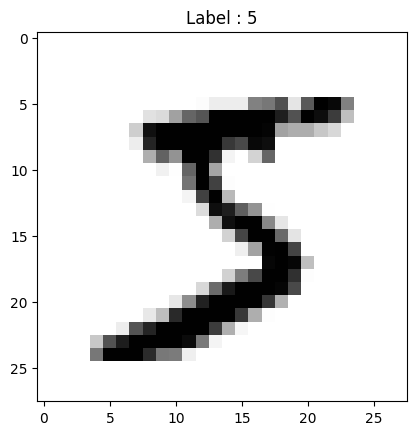

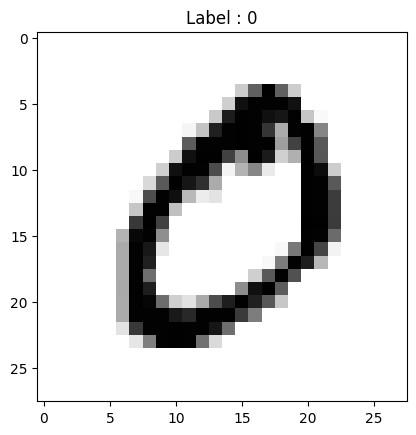

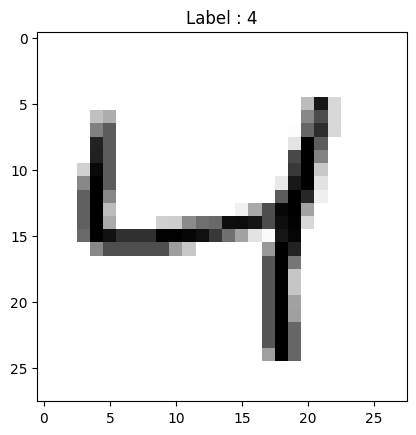

In [145]:
for i in range(3):
    digit = train_images[i]
    plt.imshow(digit,cmap='binary')
    plt.title(f"Label : {train_labels[i]}")
    plt.show()

# Listing 2.2 The network architecture

In [146]:
model = keras.Sequential([
    layers.Dense(512,activation = "relu"),
    layers.Dense(10,activation = "softmax")
 ])

# Listing 2.3 The compilation step

In [147]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Listing 2.4 Preparing the image data

In [148]:
train_images.shape

(60000, 28, 28)

In [149]:
train_images = train_images.reshape((60000, 28 * 28)) # 2D to 1D conversion
train_images = train_images.astype("float32") / 255 # Normalization
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [150]:
train_images.shape

(60000, 784)

# Listing 2.5 “Fitting” the model

In [151]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2634 - accuracy: 0.9248
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1065 - accuracy: 0.9682
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0715 - accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9846
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0386 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0095 - accuracy: 0.9

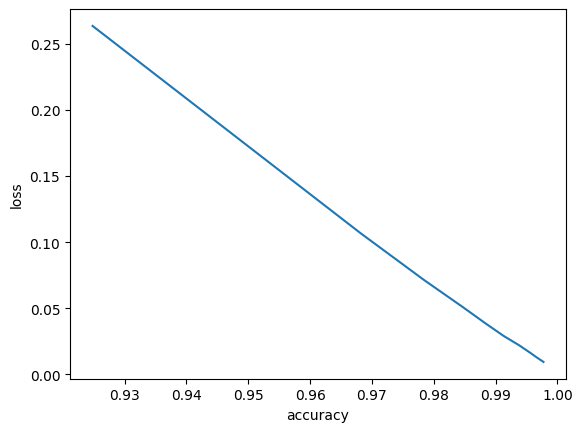

In [152]:
x = history.history["accuracy"]
y = history.history["loss"]
plt.xlabel("accuracy")
plt.ylabel("loss")

plt.plot(x,y)

# Listing 2.6 Using the model to make predictions

In [153]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

model.evaluate(test_digits,test_labels[0:10])

1/1 [==============================] - 0s 145ms/step - loss: 7.6757e-04 - accuracy: 1.0000


[0.0007675695233047009, 1.0]

1/1 [==============================] - 0s 38ms/step


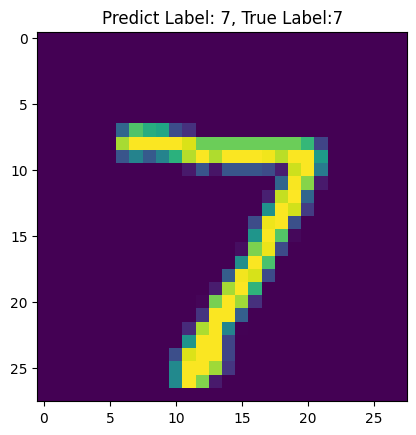

1/1 [==============================] - 0s 28ms/step


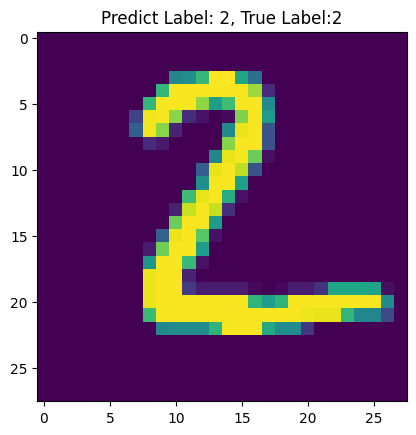

1/1 [==============================] - 0s 31ms/step


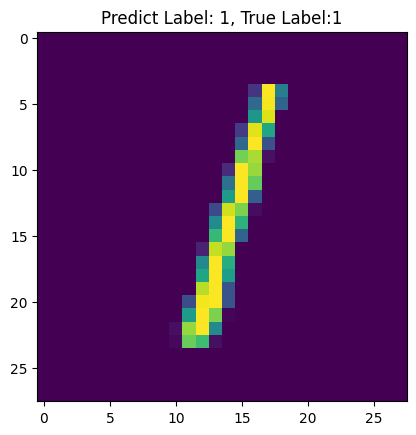

1/1 [==============================] - 0s 29ms/step


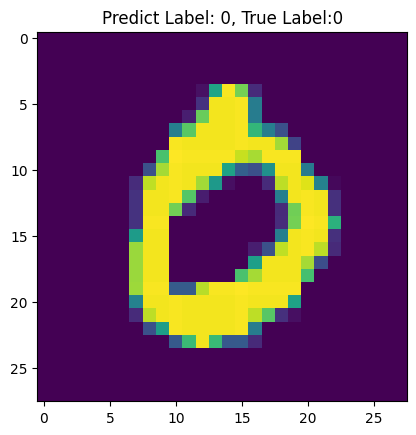

1/1 [==============================] - 0s 32ms/step


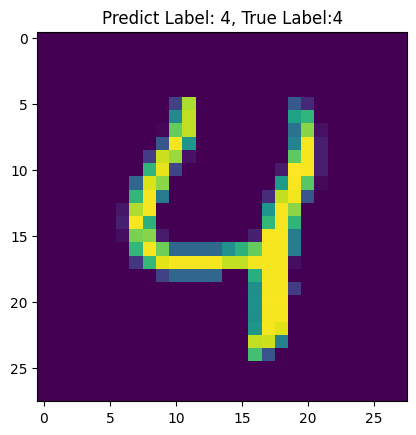

1/1 [==============================] - 0s 27ms/step


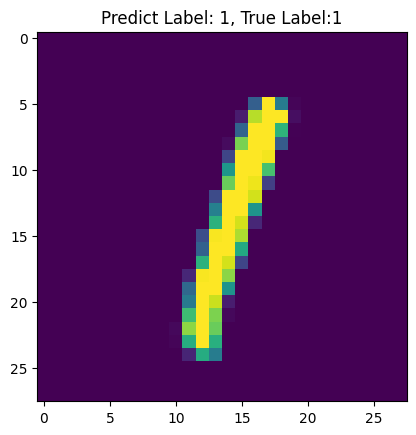

1/1 [==============================] - 0s 30ms/step


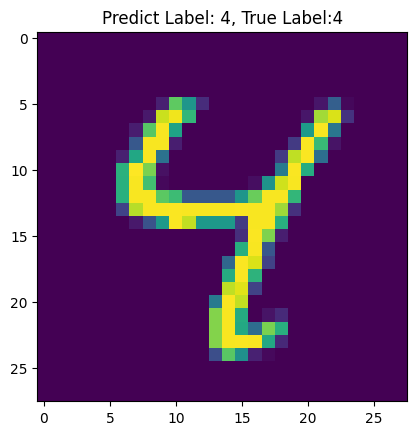

1/1 [==============================] - 0s 29ms/step


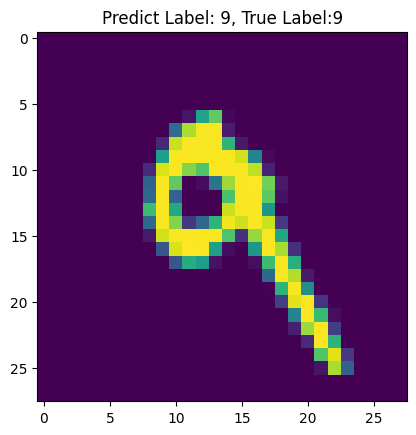

1/1 [==============================] - 0s 29ms/step


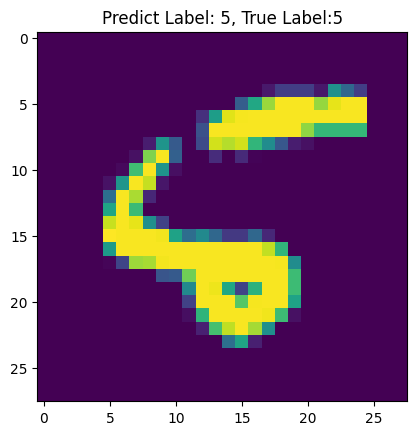

1/1 [==============================] - 0s 30ms/step


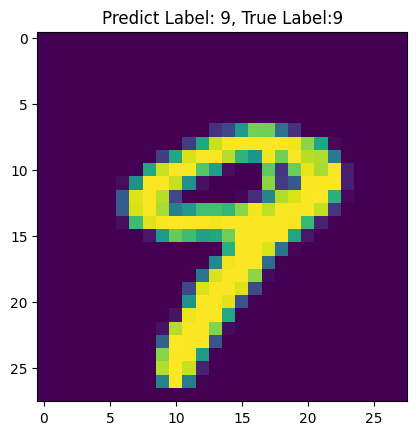

In [154]:
test_digits = test_images[0:10]
cnt = 0

for digit in test_digits:
    plt.title(f"Predict Label: {np.argmax(model.predict(digit.reshape(1,784)))}, True Label:{test_labels[cnt]}")
    plt.imshow(digit.reshape((28,28)))
    plt.show()
    cnt+=1